In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import train_test_split


# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape

(10000, 20)

In [4]:
test.shape

(5000, 19)

In [5]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [6]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [9]:
train['Rooms'] = train['Rooms'].astype('int64')
test['Rooms'] = test['Rooms'].astype('int64')
train['HouseFloor'] = train['HouseFloor'].astype('int64')
test['HouseFloor'] = test['HouseFloor'].astype('int64')

In [10]:
train.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,10000.0,NaN,NaN,NaN,8383.4077,4859.01902,0.0,4169.5,8394.5,12592.5,16798.0
DistrictId,10000.0,NaN,NaN,NaN,50.4008,43.587592,0.0,20.0,36.0,75.0,209.0
Rooms,10000.0,NaN,NaN,NaN,1.8905,0.839512,0.0,1.0,2.0,2.0,19.0
Square,10000.0,NaN,NaN,NaN,56.315775,21.058732,1.136859,41.774881,52.51331,65.900625,641.065193
LifeSquare,7887.0,NaN,NaN,NaN,37.199645,86.241209,0.370619,22.769832,32.78126,45.128803,7480.592129
KitchenSquare,10000.0,NaN,NaN,NaN,6.2733,28.560917,0.0,1.0,6.0,9.0,2014.0
Floor,10000.0,NaN,NaN,NaN,8.5267,5.241148,1.0,4.0,7.0,12.0,42.0
HouseFloor,10000.0,NaN,NaN,NaN,12.6094,6.775974,0.0,9.0,13.0,17.0,117.0
HouseYear,10000.0,NaN,NaN,NaN,3990.1663,200500.261427,1910.0,1974.0,1977.0,2001.0,20052011.0
Ecology_1,10000.0,NaN,NaN,NaN,0.118858,0.119025,0.0,0.017647,0.075424,0.195781,0.521867


Данные неполные, содержат выбросы.
Показатель Healthcare_1 содержит почти половину пропусков (52% данных), отбросим его при анализе.

In [16]:
#Разобъём данные на тестовые и валидационные
train, valid = train_test_split(train, test_size=0.3, random_state=100)

In [17]:
#Определим функцию для очистки данных от выбросов и заполнения пропусков

def clean_data(df, initial_df = train):
    
    
    #Введем справочные значения (расчетные или взяты из нормативных и справочных документов) 
      
    ROOMS_MEDIAN = initial_df['Rooms'].median()
    MIN_SQUARE = 24
    MIN_ROOM = 6
    KITCHEN = 5
    MAX_SQUARE1 = 100
    MIN_LIFE = 14
    T_HALL = 2.55 #Toilet 1.05 + Hall 1.5
    K_LIFE = 0.65  #Примерный коэффициент Life Square/ Square (без учета количества комнат)
    MAX_STORE = 89 #Federation Tower in 2018
    AVG_STORE = 6 #2Gis for Moscow
    STORE_40 = 40 #До 1980 этажность не превышала 40 тажей в МСК
    
    avg_price = initial_df.groupby(['DistrictId'])['Price'].mean().reset_index()
    avg_price.columns = ['DistrictId','mean_price_district']
    
    # заменим кол-во комнат большее 5 и 0 на медианное значение
    df.loc[(df['Rooms'] == 0 ) | (df['Rooms'] > 5) , 'Rooms'] = ROOMS_MEDIAN
     
    # Если площадь = 0 или больше 200 то заменим на среднее значение
    avg_square = initial_df.groupby('Rooms')['Square'].mean().reset_index()
    avg_square.columns = ['Rooms','mean_square']
    df = pd.merge(df, avg_square, how = 'left', on = ['Rooms'])
    df.loc[((df['Square'] == 0) | (df['Square'] > 200) ), 'Square'] = df['mean_square']
    
    #Увеличиваем площадь до минимальной, если она меньше нормативной
    df.loc[(df['Square'] < (MIN_SQUARE + (df['Rooms'] - 1) * MIN_ROOM )), 'Square'] = (MIN_SQUARE + (df['Rooms'] - 1) * MIN_ROOM )
    
    #Жилые однокомнатные редко бывают больше 100 кв.м.
    #Увеличим количество комнат до средней
    df.loc[((df['Rooms'] == 1) & (df['Square'] > MAX_SQUARE1) ), 'Rooms'] = ROOMS_MEDIAN
    
    # Добавим данные по средней цене по району
    df = pd.merge(df, avg_price, how = 'left', on = ['DistrictId'])
    df['mean_price_district'].fillna(value=initial_df.Price.mean(), inplace = True)   
    
    #Кухни с площадью меньше норматива в однокомнатных квартирах с минимальной площадью 
    #приравняем к нормативу. Остальные к медиане.
    #Кухни с площадью больше 40% площади приравняем к медиане
    df.loc[
        ((df['KitchenSquare'] < KITCHEN) & (df['Rooms'] == 1) & (df['Square'] == MIN_SQUARE)) , 'KitchenSquare'
    ] = KITCHEN
    
    df.loc[
        ((df['KitchenSquare'] < KITCHEN) |(df['KitchenSquare'] > 0.4 * df['Square'])), 'KitchenSquare'
    ] = initial_df['KitchenSquare'].median()

    # Для жилой площади, если она меньше 0.5 от площади, то приравниваем ее к нормативному коэффициенту
    # Если жилая площадь больше, чем общая площадь за минусом кухни и туалета, то уменьшаем до максимума
    df.loc[
        ((df['LifeSquare'] < 0.5 * df['Square']) | (df['LifeSquare'].isnull())), 'LifeSquare'
    ] = df['Square'] * K_LIFE
    
    df.loc[
        (df['LifeSquare'] > (df['Square'] - df['KitchenSquare'] - T_HALL )),'LifeSquare'
    ] = (df['Square'] - df['KitchenSquare'] - T_HALL )  
    
    df.loc[
        (df['LifeSquare'] < MIN_LIFE), 'LifeSquare'
    ] = MIN_LIFE
    
    #HouseYear - не старее 1900, не моложе 2022
    df.loc[(df['HouseYear'] > 2022) ,'HouseYear'] = 2022
    df.loc[(df['HouseYear'] < 1900) ,'HouseYear'] = 1900
    
    #House Floor. Максимум с МСК 100 этажей, до 1980 года - 40 этажей. Средняя 6 этажей
    df.loc[((df['HouseFloor'] > STORE_40) & (df['HouseYear'] < 1980)), 'HouseFloor'] = STORE_40
    df.loc[(df['HouseFloor'] > MAX_STORE), 'HouseFloor'] = MAX_STORE
    df.loc[(df['HouseFloor'] == 0), 'HouseFloor'] = AVG_STORE
            
    #Floor - не должен превышать высоту здания
    df.loc[(df['Floor'] > df['HouseFloor']), 'Floor'] = df['HouseFloor']
    
    # закодируем категориальные признаки
    df['Shops_2'] = df['Shops_2'].map({'A':1, 'B':0})
    df['Ecology_2'] = df['Ecology_2'].map({'A':1, 'B':0})
    df['Ecology_3'] = df['Ecology_3'].map({'A':1, 'B':0})
    
    return df


In [18]:
train = clean_data(train, train)
valid  = clean_data(valid, train)

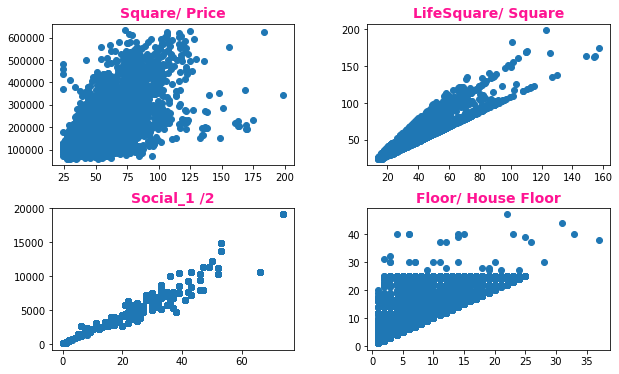

In [19]:
#Визуализируем очищенные данные из тренировочного датасета

fig, ax = plt. subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()
title_font = {
    'fontsize': 14,
    'color': '#FF1493',
    'fontweight': 'bold'
}
ax1.scatter(train['Square'], train['Price'])
ax1.set_title('Square/ Price', fontdict=title_font)
ax2.scatter(train['LifeSquare'], train['Square'])
ax2.set_title('LifeSquare/ Square', fontdict=title_font)
ax3.scatter(train['Social_1'], train['Social_2'])
ax3.set_title('Social_1 /2', fontdict=title_font)
ax4.scatter(train['Floor'], train['HouseFloor'])
ax4.set_title('Floor/ House Floor', fontdict=title_font)

fig.set_size_inches(10, 6)
plt.subplots_adjust(wspace=0.3, hspace=0.3)


СЛУЧАЙНЫЙ ЛЕС

In [49]:
features = train.keys().tolist()
features.remove('Id')
features.remove('Healthcare_1')
features.remove('Price')
print(features)

['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2', 'mean_square', 'mean_price_district']


In [50]:
model_rfr1 = RFR(n_estimators= 500, min_samples_leaf=1, n_jobs=-1, random_state=100, max_features=3)

model_rfr1.fit(train.loc[:, features], train['Price'])
y_pred_valid = model_rfr1.predict(valid.loc[:, features])
y_pred_train = model_rfr1.predict(train.loc[:, features])
r2_valid = r2(valid['Price'], y_pred_valid)
r2_train = r2(train['Price'], y_pred_train)
print(f'Random Forest Regressor(first version) : \n\tr2_valid = {r2_valid:.4f} \n\tr2_train = {r2_train:.4f}\n')

Random Forest Regressor(first version) : 
	r2_valid = 0.7383 
	r2_train = 0.9657



In [51]:
model_rfr2 = RFR(max_depth = 9, max_features = 9, n_estimators = 250, random_state = 100)
model_rfr2.fit(train.loc[:, features], train['Price'])
y_pred_valid = model_rfr2.predict(valid.loc[:, features])
y_pred_train = model_rfr2.predict(train.loc[:, features])
r2_valid = r2(valid['Price'], y_pred_valid)
r2_train = r2(train['Price'], y_pred_train)
print(f'Random Forest Regressor(second version) : \n\tr2_valid = {r2_valid:.4f} \n\tr2_train = {r2_train:.4f}\n')

Random Forest Regressor(second version) : 
	r2_valid = 0.7348 
	r2_train = 0.8574



Обе модели дают высокие показатели метрики R2, вторая чуть хуже. На тестовых данных воспользуемся первой моделью

In [54]:
# Тестовые данные
test = pd.read_csv('test.csv')
test = clean_data(test)
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,mean_square,mean_price_district
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,0,11,2748,1,NaN,0,0,0,56.841027,158397.131791
1,15856,74,2.0,69.263183,45.021069,6.0,1,1.0,1977,0.075779,...,0,6,1437,3,NaN,0,2,0,56.841027,209771.542223
2,5480,190,1.0,24.000000,15.450000,6.0,2,5.0,1909,0.000000,...,0,30,7538,87,4702.0,5,5,0,41.385534,471585.416503
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,0,23,4583,3,NaN,3,3,0,56.841027,213815.499757
4,14275,27,1.0,47.527111,38.977111,6.0,17,17.0,2017,0.072158,...,0,2,629,1,NaN,0,0,1,41.385534,155367.645811


In [55]:
test['Price'] = model_rfr1.predict(test.loc[:, features])
test.describe(include='all').transpose().apply(round)

,count,mean,std,min,25%,50%,75%,max
Id,5000.0,8413.0,4833.0,1.0,4222.0,8320.0,12598.0,16795.0
DistrictId,5000.0,51.0,44.0,0.0,21.0,37.0,77.0,212.0
Rooms,5000.0,2.0,1.0,1.0,1.0,2.0,2.0,5.0
Square,5000.0,56.0,19.0,24.0,42.0,53.0,66.0,190.0
LifeSquare,5000.0,37.0,14.0,14.0,27.0,34.0,45.0,160.0
KitchenSquare,5000.0,7.0,2.0,5.0,6.0,6.0,9.0,42.0
Floor,5000.0,8.0,5.0,1.0,4.0,7.0,11.0,46.0
HouseFloor,5000.0,13.0,6.0,1.0,9.0,12.0,17.0,48.0
HouseYear,5000.0,1984.0,19.0,1908.0,1973.0,1977.0,2000.0,2020.0
Ecology_1,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [56]:
test.loc[:, ['Id', 'Price']].to_csv('AArtiushina_predictions.csv', index = False)